#문제
1. corona.csv 파일 로드
2. Unnamed: 0 컬럼을 삭제 -> drop or 애초에 안불러오기
3. 컬럼을 첫번째부터 세번째까지 컬럼만 두고 전부 삭제
4. 컬럼의 이름 변경 : ['등록일시', '누적사망자', '누적확진자']
5. 등록일시를 기준으로 오름차순 정렬 
6. 일일확진자와 일일사망자 파생변수를 생성
    - 결측치는 0으로 대체
7. 일일확진자가 음수인 값을 삭제
7. 등록일시를 시계열로 변경 후 인덱스로
8. 요일이라는 파생변수 만들어서 요일 대입 
9. 요일 컬럼 0 -> 월, 1-> 화, ... 6->일  로 변경
10. 요일별 일일확진자의 평균을 바 그래프로 표시
11. 요일별 일일사망자의 평균을 바 그래프로 표시


In [2]:
import pandas as pd

In [142]:
df = pd.read_csv('../csv/corona.csv') 

In [143]:
df

,Unnamed: 0,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate
0,0,2022-06-08 09:09:05.982,24305,18188200,904,20220608,00:00,NaN,NaN,NaN
1,1,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,NaN,NaN
2,2,2022-06-06 09:00:06.734,24279,18168670,902,20220606,00:00,2022-06-08 09:10:50.441,NaN,NaN
3,3,2022-06-05 08:53:19.426,24258,18163648,901,20220605,00:00,2022-06-08 09:11:04.758,NaN,NaN
4,4,2022-06-04 08:56:49.219,24238,18153814,900,20220604,00:00,2022-06-08 09:11:26.303,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
815,815,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000
816,816,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499
817,817,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744
818,818,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175


In [144]:
# 2. 

df = df.drop('Unnamed: 0', axis=1)

In [145]:
df

,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate
0,2022-06-08 09:09:05.982,24305,18188200,904,20220608,00:00,NaN,NaN,NaN
1,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,NaN,NaN
2,2022-06-06 09:00:06.734,24279,18168670,902,20220606,00:00,2022-06-08 09:10:50.441,NaN,NaN
3,2022-06-05 08:53:19.426,24258,18163648,901,20220605,00:00,2022-06-08 09:11:04.758,NaN,NaN
4,2022-06-04 08:56:49.219,24238,18153814,900,20220604,00:00,2022-06-08 09:11:26.303,NaN,NaN
...,...,...,...,...,...,...,...,...,...
815,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000
816,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499
817,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744
818,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175


In [146]:
#3.
df = df.iloc[:, 0:3]
df

,createDt,deathCnt,decideCnt
0,2022-06-08 09:09:05.982,24305,18188200
1,2022-06-07 09:09:00.897,24299,18174842
2,2022-06-06 09:00:06.734,24279,18168670
3,2022-06-05 08:53:19.426,24258,18163648
4,2022-06-04 08:56:49.219,24238,18153814
...,...,...,...
815,2020-03-14 00:00:00.000,72,8086
816,2020-03-13 00:00:00.000,67,7979
817,2020-03-12 00:00:00.000,66,7869
818,2020-03-11 00:00:00.000,60,7755


In [147]:
#4.

df.columns = ['등록일시', '누적사망자', '누적확진자']
df.head(1)

,등록일시,누적사망자,누적확진자
0,2022-06-08 09:09:05.982,24305,18188200


In [148]:
#5.

df = df.sort_values('등록일시')
df

,등록일시,누적사망자,누적확진자
819,2020-03-10 00:00:00.000,54,7513
818,2020-03-11 00:00:00.000,60,7755
817,2020-03-12 00:00:00.000,66,7869
816,2020-03-13 00:00:00.000,67,7979
815,2020-03-14 00:00:00.000,72,8086
...,...,...,...
4,2022-06-04 08:56:49.219,24238,18153814
3,2022-06-05 08:53:19.426,24258,18163648
2,2022-06-06 09:00:06.734,24279,18168670
1,2022-06-07 09:09:00.897,24299,18174842


In [149]:
#6. 

df['일일확진자'] = df['누적확진자'] - df.shift(1)['누적확진자']
df['일일확진자'] = df['일일확진자'].fillna(0)

In [150]:
df

,등록일시,누적사망자,누적확진자,일일확진자
819,2020-03-10 00:00:00.000,54,7513,0.0
818,2020-03-11 00:00:00.000,60,7755,242.0
817,2020-03-12 00:00:00.000,66,7869,114.0
816,2020-03-13 00:00:00.000,67,7979,110.0
815,2020-03-14 00:00:00.000,72,8086,107.0
...,...,...,...,...
4,2022-06-04 08:56:49.219,24238,18153814,12039.0
3,2022-06-05 08:53:19.426,24258,18163648,9834.0
2,2022-06-06 09:00:06.734,24279,18168670,5022.0
1,2022-06-07 09:09:00.897,24299,18174842,6172.0


In [151]:
df['일일사망자'] = df['누적사망자'] - df.shift(1)['누적사망자']
df['일일사망자'] = df['일일사망자'].fillna(0)

In [152]:
df.loc[df['일일확진자']<0]

,등록일시,누적사망자,누적확진자,일일확진자,일일사망자
374,2021-05-30 00:00:00.000,1957,139907,-430.0,-2.0


In [153]:
df = df.loc[df['일일확진자']>=0]

In [154]:
df

,등록일시,누적사망자,누적확진자,일일확진자,일일사망자
819,2020-03-10 00:00:00.000,54,7513,0.0,0.0
818,2020-03-11 00:00:00.000,60,7755,242.0,6.0
817,2020-03-12 00:00:00.000,66,7869,114.0,6.0
816,2020-03-13 00:00:00.000,67,7979,110.0,1.0
815,2020-03-14 00:00:00.000,72,8086,107.0,5.0
...,...,...,...,...,...
4,2022-06-04 08:56:49.219,24238,18153814,12039.0,9.0
3,2022-06-05 08:53:19.426,24258,18163648,9834.0,20.0
2,2022-06-06 09:00:06.734,24279,18168670,5022.0,21.0
1,2022-06-07 09:09:00.897,24299,18174842,6172.0,20.0


In [155]:
df['등록일시'] = pd.to_datetime(df['등록일시'])

C:\Users\zino0\AppData\Local\Temp\ipykernel_18072\1929878470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['등록일시'] = pd.to_datetime(df['등록일시'])


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 819 to 0
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   등록일시    819 non-null    datetime64[ns]
 1   누적사망자   819 non-null    int64         
 2   누적확진자   819 non-null    int64         
 3   일일확진자   819 non-null    float64       
 4   일일사망자   819 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 38.4 KB


In [157]:
df = df.set_index('등록일시')

In [158]:
df

,누적사망자,누적확진자,일일확진자,일일사망자
등록일시,,,,
2020-03-10 00:00:00.000,54,7513,0.0,0.0
2020-03-11 00:00:00.000,60,7755,242.0,6.0
2020-03-12 00:00:00.000,66,7869,114.0,6.0
2020-03-13 00:00:00.000,67,7979,110.0,1.0
2020-03-14 00:00:00.000,72,8086,107.0,5.0
...,...,...,...,...
2022-06-04 08:56:49.219,24238,18153814,12039.0,9.0
2022-06-05 08:53:19.426,24258,18163648,9834.0,20.0
2022-06-06 09:00:06.734,24279,18168670,5022.0,21.0


In [159]:
df.index[0].weekday()

1

In [160]:
len(df.index)

819

In [161]:
_df = df.copy

In [162]:
# 9.요일 파생변수

for i in df.index :  
    df.loc[i, '요일'] = i.weekday()

df

,누적사망자,누적확진자,일일확진자,일일사망자,요일
등록일시,,,,,
2020-03-10 00:00:00.000,54,7513,0.0,0.0,1.0
2020-03-11 00:00:00.000,60,7755,242.0,6.0,2.0
2020-03-12 00:00:00.000,66,7869,114.0,6.0,3.0
2020-03-13 00:00:00.000,67,7979,110.0,1.0,4.0
2020-03-14 00:00:00.000,72,8086,107.0,5.0,5.0
...,...,...,...,...,...
2022-06-04 08:56:49.219,24238,18153814,12039.0,9.0,5.0
2022-06-05 08:53:19.426,24258,18163648,9834.0,20.0,6.0
2022-06-06 09:00:06.734,24279,18168670,5022.0,21.0,0.0


In [166]:
_df = df.copy()

In [237]:
df = _df.copy()

In [238]:
df

,누적사망자,누적확진자,일일확진자,일일사망자,요일
등록일시,,,,,
2020-03-10 00:00:00.000,54,7513,0.0,0.0,1.0
2020-03-11 00:00:00.000,60,7755,242.0,6.0,2.0
2020-03-12 00:00:00.000,66,7869,114.0,6.0,3.0
2020-03-13 00:00:00.000,67,7979,110.0,1.0,4.0
2020-03-14 00:00:00.000,72,8086,107.0,5.0,5.0
...,...,...,...,...,...
2022-06-04 08:56:49.219,24238,18153814,12039.0,9.0,5.0
2022-06-05 08:53:19.426,24258,18163648,9834.0,20.0,6.0
2022-06-06 09:00:06.734,24279,18168670,5022.0,21.0,0.0


In [239]:
df['요일'] = df['요일'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 819 entries, 2020-03-10 00:00:00 to 2022-06-08 09:09:05.982000
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   누적사망자   819 non-null    int64  
 1   누적확진자   819 non-null    int64  
 2   일일확진자   819 non-null    float64
 3   일일사망자   819 non-null    float64
 4   요일      819 non-null    int32  
dtypes: float64(2), int32(1), int64(2)
memory usage: 67.5 KB


In [243]:
dict(df['요일'])

{Timestamp('2020-03-10 00:00:00'): 1,
 Timestamp('2020-03-11 00:00:00'): 2,
 Timestamp('2020-03-12 00:00:00'): 3,
 Timestamp('2020-03-13 00:00:00'): 4,
 Timestamp('2020-03-14 00:00:00'): 5,
 Timestamp('2020-03-15 00:00:00'): 6,
 Timestamp('2020-03-16 00:00:00'): 0,
 Timestamp('2020-03-17 00:00:00'): 1,
 Timestamp('2020-03-18 00:00:00'): 2,
 Timestamp('2020-03-19 00:00:00'): 3,
 Timestamp('2020-03-20 00:00:00'): 4,
 Timestamp('2020-03-21 00:00:00'): 5,
 Timestamp('2020-03-22 00:00:00'): 6,
 Timestamp('2020-03-23 00:00:00'): 0,
 Timestamp('2020-03-24 00:00:00'): 1,
 Timestamp('2020-03-25 00:00:00'): 2,
 Timestamp('2020-03-26 00:00:00'): 3,
 Timestamp('2020-03-27 00:00:00'): 4,
 Timestamp('2020-03-28 00:00:00'): 5,
 Timestamp('2020-03-29 00:00:00'): 6,
 Timestamp('2020-03-30 00:00:00'): 0,
 Timestamp('2020-03-31 00:00:00'): 1,
 Timestamp('2020-04-01 00:00:00'): 2,
 Timestamp('2020-04-02 00:00:00'): 3,
 Timestamp('2020-04-03 00:00:00'): 4,
 Timestamp('2020-04-04 00:00:00'): 5,
 Timestamp('

In [241]:
week = {
    0:'월',
    1:'화',
    2:'수',
    3:'목',
    4:'금',
    5:'토',
    6:'일'
}

In [236]:
#10 zino
df['요일'] = {
    0:'월',
    1:'화',
    2:'수',
    3:'목',
    4:'금',
    5:'토',
    6:'일'
}


ValueError: If using all scalar values, you must pass an index

In [231]:
df['요일'].value_counts()

Series([], Name: 요일, dtype: int64)

In [201]:
# Moon

# 1,2,3,8 한번에

# df0 = pd.read_csv('../csv/corona.csv', usecols= [1,2,3], parse_dates=[0]) # 이용할 컬럼 먼저 선택되고, 그중 첫번째 컬럼을 시계열 데이터로
df0 = pd.read_csv('../csv/corona.csv', usecols= [1,2,3])
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   createDt   820 non-null    object
 1   deathCnt   820 non-null    int64 
 2   decideCnt  820 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 19.3+ KB


In [202]:
df0.columns = ['등록일시', '누적사망자', '누적확진자']
df0.head()

,등록일시,누적사망자,누적확진자
0,2022-06-08 09:09:05.982,24305,18188200
1,2022-06-07 09:09:00.897,24299,18174842
2,2022-06-06 09:00:06.734,24279,18168670
3,2022-06-05 08:53:19.426,24258,18163648
4,2022-06-04 08:56:49.219,24238,18153814


In [203]:
df0.sort_values('등록일시', inplace= True)

In [204]:
df0['일일확진자'] = df0['누적확진자'].diff().fillna(0)
df0['일일사망자'] = (df0['누적사망자'] - df0['누적사망자'].shift(1)).fillna(0)
df0

,등록일시,누적사망자,누적확진자,일일확진자,일일사망자
819,2020-03-10 00:00:00.000,54,7513,0.0,0.0
818,2020-03-11 00:00:00.000,60,7755,242.0,6.0
817,2020-03-12 00:00:00.000,66,7869,114.0,6.0
816,2020-03-13 00:00:00.000,67,7979,110.0,1.0
815,2020-03-14 00:00:00.000,72,8086,107.0,5.0
...,...,...,...,...,...
4,2022-06-04 08:56:49.219,24238,18153814,12039.0,9.0
3,2022-06-05 08:53:19.426,24258,18163648,9834.0,20.0
2,2022-06-06 09:00:06.734,24279,18168670,5022.0,21.0
1,2022-06-07 09:09:00.897,24299,18174842,6172.0,20.0


In [207]:
#7
df0 = df0.loc[~(df0['일일확진자'] < 0)] # csv파일 불러올 때 parse_dates 이거 하면 안나온다고 함 (read_csv 한 셀 참고 )

In [209]:
#8
df0['등록일시'] = pd.to_datetime(df0['등록일시'])

C:\Users\zino0\AppData\Local\Temp\ipykernel_18072\3574504830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['등록일시'] = pd.to_datetime(df0['등록일시'])


In [210]:
#8
df0.set_index('등록일시', inplace= True)

In [211]:
# 9

for i in df.index :
    df0.loc[i,'요일'] = i.weekday()

C:\Users\zino0\AppData\Local\Temp\ipykernel_18072\3676967945.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0.loc[i,'요일'] = i.weekday()


In [213]:
df0['요일'].value_counts()

1.0    118
2.0    118
4.0    117
5.0    117
6.0    117
3.0    116
0.0    116
Name: 요일, dtype: int64

In [217]:
#10

# df0['요일'].unique()

_list = df0['요일'].astype(int).unique()

In [218]:
week_name = ['월', '화', '수', '목', '금', '토', '일']

for i in _list :
    df0.loc[df0['요일']==i, '요일'] = week_name[i]

In [219]:
df0['요일'].value_counts()

화    118
수    118
금    117
토    117
일    117
목    116
월    116
Name: 요일, dtype: int64

In [223]:
import platform
import matplotlib.pyplot as plt


plt.rc('font', family = 'Malgun Gothic')

<Axes: xlabel='요일'>

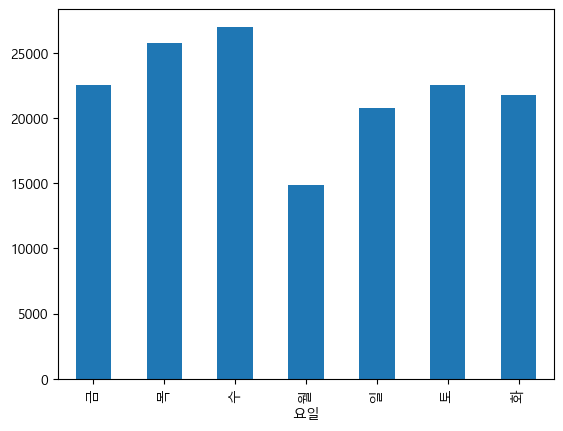

In [225]:
# 11
df0.groupby('요일')['일일확진자'].mean().plot.bar()

<Axes: xlabel='요일'>

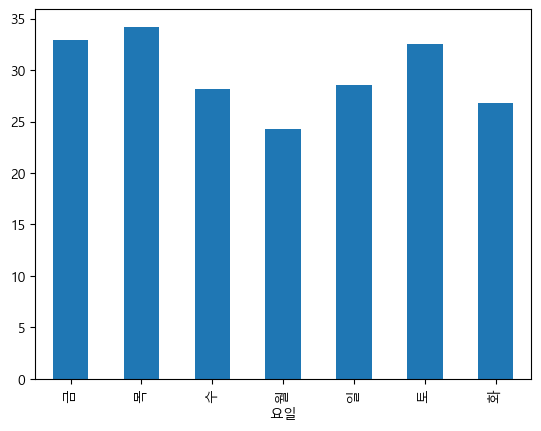

In [224]:
# 12
df0.groupby('요일')['일일사망자'].mean().plot.bar()